# Root mean square propagation (RMSprop)

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 130
n2 = 15
eta = 0.3 #learning rate

Nepoch = 2500
Nbatch = 13
Batchsize = 10

epsi = 10**(-8)

In [3]:
# ETAPE 2

# génération des données d'apprentissage

X = np.linspace(0,1,n).reshape(1,n)
y = np.sin(2*np.pi*X)

In [4]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)


In [5]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1)

In [6]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = z3

    #C = np.mean((a3 - y)**2)*0.5
    # Calcul
    delta3 = (a3-y)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    #dCdW2 = dCdW2.T
    dCdW3 = np.dot(delta3,a2.T)
    #dCdW3 = dCdW2.T
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [7]:
# ETAPE 6

# Définition de la fonction coût

def cost(y,y_pred):
    return (1/2*n)* np.linalg.norm(y-y_pred)**2

In [8]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = z3
     
    return a3

In [9]:
Cost = np.zeros(Nepoch)

beta = 0.9


dCdW2_avg = np.zeros(W2.shape)
dCdW3_avg = np.zeros(W3.shape)
dCdb2_avg = np.zeros(b2.shape)
dCdb3_avg = np.zeros(b3.shape)

HkW2=np.zeros(W2.shape)
HkW3=np.zeros(W3.shape)
Hkb2=np.zeros(b2.shape)
Hkb3=np.zeros(b3.shape)

for k in range(Nepoch):
    
    # Votre code ici
    
    # Mélanger des données
    (X,y) = shuffle(X,y)
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)

    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize

            xi = X[0][u+i]
            yi = y[0][u+i]
            
            gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
            
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3.reshape(np.shape(dCdb3))
            
        dCdW2_avg = beta*dCdW2_avg + (1-beta)*dCdW2*dCdW2
        dCdW3_avg = beta*dCdW3_avg + (1-beta)*dCdW3*dCdW3
        dCdb2_avg = beta*dCdb2_avg + (1-beta)*dCdb2*dCdb2
        dCdb3_avg = beta*dCdb3_avg + (1-beta)*dCdb3*dCdb3
            
        HkW2=1/(np.sqrt(dCdW2_avg+epsi))
        HkW3=1/(np.sqrt(dCdW3_avg+epsi))
        Hkb2=1/(np.sqrt(dCdb2_avg+epsi))
        Hkb3=1/(np.sqrt(dCdb3_avg+epsi))
        
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*HkW2*dCdW2
        W3 = W3 - (eta/Batchsize)*HkW3*dCdW3
        b2 = b2 - (eta/Batchsize)*Hkb2*dCdb2
        b3 = b3 - (eta/Batchsize)*Hkb3*dCdb3


In [10]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.07693804,  0.15925344,  0.237057  ,  0.31034478,  0.37915601,
         0.44356741,  0.50368745,  0.55965053,  0.61161159,  0.65974093,
         0.70421954,  0.74523494,  0.78297752,  0.81763742,  0.84940185,
         0.87845301,  0.90496627,  0.92910885,  0.95103874,  0.97090401,
         0.98884222,  1.00498009,  1.01943338,  1.03230672,  1.04369372,
         1.05367697,  1.06232818,  1.06970828,  1.07586759,  1.08084588,
         1.08467248,  1.08736639,  1.08893631,  1.08938067,  1.08868768,
         1.08683538,  1.08379164,  1.07951434,  1.07395145,  1.06704134,
         1.05871318,  1.04888748,  1.03747687,  1.02438711,  1.00951844,
         0.99276712,  0.97402744,  0.95319402,  0.93016441,  0.90484206,
         0.87713957,  0.84698208,  0.81431082,  0.77908662,  0.74129332,
         0.70094085,  0.65806795,  0.61274428,  0.56507183,  0.51518556,
         0.46325314,  0.40947378,  0.35407616,  0.29731548,  0.23946971,
         0.18083529,  0.12172221,  0.06244883,  0.0

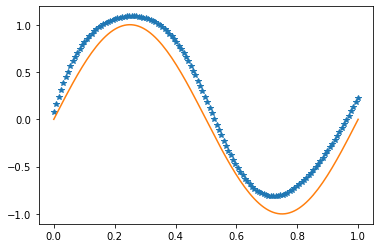

In [11]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0], label="Verité" )

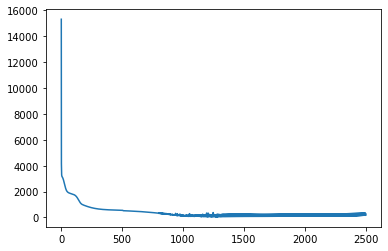

In [12]:
plt.plot(Cost)